In [1]:
%matplotlib inline


In [2]:

satellite_name = "aquaris"
base_dir = f"D:/Paper_1/segmentation"
dataset_dir = f"{base_dir}/datasets/{satellite_name}"
results_dir = f"{base_dir}/yolo_results/{satellite_name}_results/{satellite_name}_seg"

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

model.train(
    data=f"{dataset_dir}/data.yaml",
    epochs=20,
    imgsz=1024,
    batch=16,
    save_period=5,
    project=f"{base_dir}/yolo_results/{satellite_name}",
    name="seg_res",
    device=0
)


New https://pypi.org/project/ultralytics/8.3.140 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.137  Python-3.12.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:/Paper_1/segmentation/datasets/aquaris/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=seg_r

train: Scanning D:\Paper_1\segmentation\datasets\aquaris\train\labels... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:03<00:00, 285.84it/s]

train: New cache created: D:\Paper_1\segmentation\datasets\aquaris\train\labels.cache


val: Fast image access  (ping: 0.60.2 ms, read: 39.926.1 MB/s, size: 525.5 KB)


val: Scanning D:\Paper_1\segmentation\datasets\aquaris\val\labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 158.75it/s]

val: New cache created: D:\Paper_1\segmentation\datasets\aquaris\val\labels.cache


Plotting labels to D:\Paper_1\segmentation\yolo_results\aquaris\seg_res\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to D:\Paper_1\segmentation\yolo_results\aquaris\seg_res
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.26G      1.917      3.699      3.969      1.397        145       1024: 100%|██████████| 68/68 [01:09<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:48<00:00,  9.61s/it]

                   all        135       1331    0.00637      0.301      0.174     0.0989      0.006      0.279      0.175     0.0879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.59G      1.582      2.903      2.505      1.245         89       1024: 100%|██████████| 68/68 [01:42<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:12<00:00,  2.45s/it]

                   all        135       1331      0.565      0.304      0.334      0.213      0.618      0.314      0.333      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20       6.3G      1.476      2.642      1.935      1.205         95       1024: 100%|██████████| 68/68 [01:45<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]

                   all        135       1331      0.625      0.423       0.44       0.29      0.664      0.415      0.429      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.32G      1.395      2.475      1.599      1.168        138       1024: 100%|██████████| 68/68 [01:21<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<00:00,  4.47s/it]

                   all        135       1331      0.766      0.418      0.466      0.326      0.783      0.406      0.448      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.29G      1.312      2.286      1.367      1.129        121       1024: 100%|██████████| 68/68 [01:34<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]

                   all        135       1331      0.736      0.461      0.491      0.338      0.715      0.459      0.468      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.28G      1.281        2.2      1.219      1.115        195       1024: 100%|██████████| 68/68 [01:11<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]

                   all        135       1331      0.783      0.472      0.511      0.355      0.815       0.46      0.493      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.46G      1.231      2.135      1.131      1.089        104       1024: 100%|██████████| 68/68 [01:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]

                   all        135       1331      0.823      0.464      0.514       0.36      0.854      0.458      0.508      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.35G      1.199      2.078      1.038      1.074        150       1024: 100%|██████████| 68/68 [01:22<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]


                   all        135       1331      0.813      0.486      0.537      0.394       0.83      0.474      0.517      0.324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.03G      1.185          2     0.9854      1.067        138       1024: 100%|██████████| 68/68 [01:13<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]

                   all        135       1331      0.826      0.483      0.534      0.386      0.823      0.474      0.521      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.18G      1.118      1.925     0.9253      1.048        116       1024: 100%|██████████| 68/68 [01:21<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.78s/it]

                   all        135       1331      0.821      0.492       0.54      0.403      0.818      0.491      0.534      0.338


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.17G      1.094      1.852     0.9163      1.045         56       1024: 100%|██████████| 68/68 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.41s/it]


                   all        135       1331      0.787      0.507      0.541      0.399      0.798      0.499      0.533       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.04G      1.073      1.834     0.8846      1.037         94       1024: 100%|██████████| 68/68 [00:59<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.31s/it]

                   all        135       1331      0.822      0.487      0.541      0.407      0.841      0.482      0.528      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.22G      1.051      1.792     0.8493      1.026         77       1024: 100%|██████████| 68/68 [01:20<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]


                   all        135       1331      0.754      0.432      0.461       0.35      0.812      0.429      0.461      0.303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.13G       1.04      1.759     0.8225      1.018         72       1024: 100%|██████████| 68/68 [01:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.40s/it]

                   all        135       1331      0.879      0.508      0.559      0.422      0.886      0.497      0.549      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.13G      1.011      1.745     0.8017      1.013         69       1024: 100%|██████████| 68/68 [01:13<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]

                   all        135       1331      0.842      0.504      0.553      0.428      0.832      0.504      0.548      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20       6.1G     0.9735      1.657     0.7769          1         49       1024: 100%|██████████| 68/68 [01:11<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]

                   all        135       1331      0.836       0.52      0.564      0.429      0.843      0.509      0.554      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.14G     0.9546      1.624     0.7463     0.9933         91       1024: 100%|██████████| 68/68 [01:18<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.40s/it]

                   all        135       1331      0.839      0.511      0.563      0.438      0.863        0.5      0.554      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.09G     0.9544      1.617     0.7306     0.9833         44       1024: 100%|██████████| 68/68 [01:12<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.42s/it]

                   all        135       1331      0.857       0.51      0.565      0.444      0.862      0.509      0.557      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.09G     0.9168      1.585     0.7101     0.9754         89       1024: 100%|██████████| 68/68 [01:13<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]

                   all        135       1331      0.853      0.513      0.569      0.446       0.88      0.505      0.562      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.15G     0.8995      1.559     0.6909     0.9707         76       1024: 100%|██████████| 68/68 [01:17<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]

                   all        135       1331      0.839      0.512      0.569      0.447       0.84      0.511      0.556      0.375



20 epochs completed in 0.545 hours.
Optimizer stripped from D:\Paper_1\segmentation\yolo_results\aquaris\seg_res\weights\last.pt, 6.9MB
Optimizer stripped from D:\Paper_1\segmentation\yolo_results\aquaris\seg_res\weights\best.pt, 6.9MB

Validating D:\Paper_1\segmentation\yolo_results\aquaris\seg_res\weights\best.pt...
Ultralytics 8.3.137  Python-3.12.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:02,  1.39it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:01<00:02,  1.11it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<00:00,  4.50s/it]


                   all        135       1331      0.838      0.512      0.569      0.446      0.842      0.511      0.556      0.375
                  base        133        863      0.742      0.149      0.196      0.115      0.759      0.153        0.2      0.111
           solar_panel        128        271      0.903      0.731      0.783      0.599       0.87      0.705      0.733      0.515
               payload        132        197       0.87      0.655      0.726      0.624      0.896      0.675      0.735      0.498
Speed: 0.9ms preprocess, 11.3ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to D:\Paper_1\segmentation\yolo_results\aquaris\seg_res


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016CD8B64B30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    

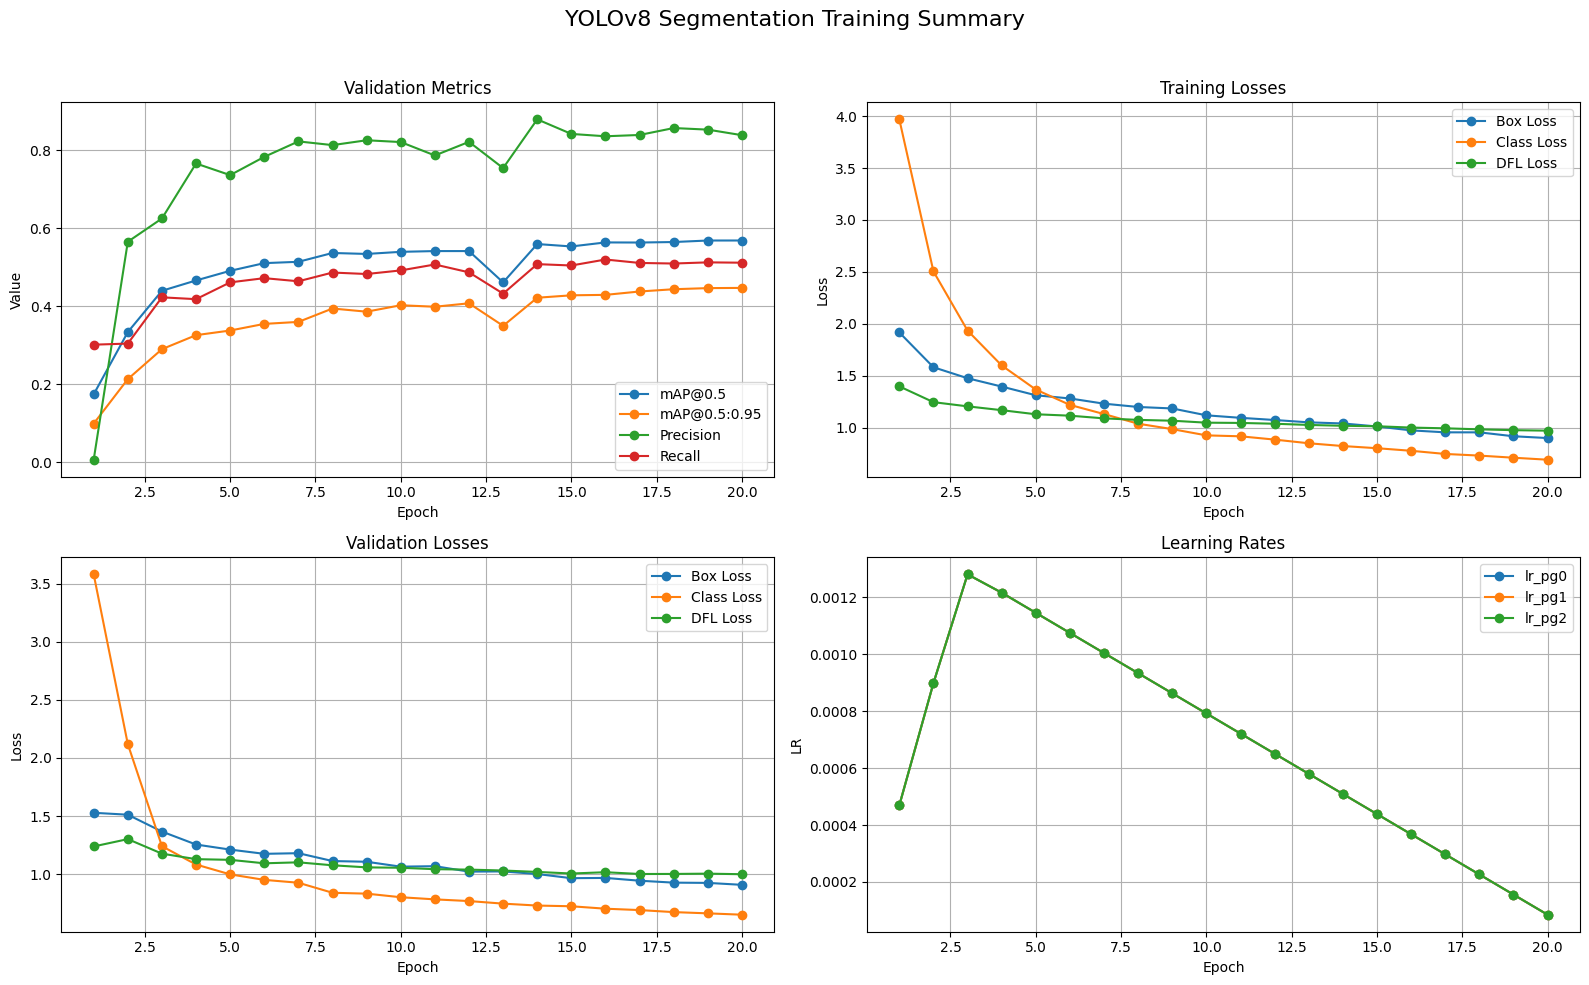

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = f"D:/Paper_1/segmentation/yolo_results/{satellite_name}/seg_res/results.csv"

df = pd.read_csv(csv_path)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# 1. METRICS: mAP, Precision, Recall
axs[0].plot(df["epoch"], df["metrics/mAP50(B)"], 'o-', label="mAP@0.5")
axs[0].plot(df["epoch"], df["metrics/mAP50-95(B)"], 'o-', label="mAP@0.5:0.95")
axs[0].plot(df["epoch"], df["metrics/precision(B)"], 'o-', label="Precision")
axs[0].plot(df["epoch"], df["metrics/recall(B)"], 'o-', label="Recall")
axs[0].set_title("Validation Metrics")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Value")
axs[0].grid(True)
axs[0].legend()

# 2. TRAIN LOSSES
axs[1].plot(df["epoch"], df["train/box_loss"], 'o-', label="Box Loss")
axs[1].plot(df["epoch"], df["train/cls_loss"], 'o-', label="Class Loss")
axs[1].plot(df["epoch"], df["train/dfl_loss"], 'o-', label="DFL Loss")
axs[1].set_title("Training Losses")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].grid(True)
axs[1].legend()

# 3. VAL LOSSES
axs[2].plot(df["epoch"], df["val/box_loss"], 'o-', label="Box Loss")
axs[2].plot(df["epoch"], df["val/cls_loss"], 'o-', label="Class Loss")
axs[2].plot(df["epoch"], df["val/dfl_loss"], 'o-', label="DFL Loss")
axs[2].set_title("Validation Losses")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Loss")
axs[2].grid(True)
axs[2].legend()

# 4. LEARNING RATES
axs[3].plot(df["epoch"], df["lr/pg0"], 'o-', label="lr_pg0")
axs[3].plot(df["epoch"], df["lr/pg1"], 'o-', label="lr_pg1")
axs[3].plot(df["epoch"], df["lr/pg2"], 'o-', label="lr_pg2")
axs[3].set_title("Learning Rates")
axs[3].set_xlabel("Epoch")
axs[3].set_ylabel("LR")
axs[3].grid(True)
axs[3].legend()

plt.suptitle("YOLOv8 Segmentation Training Summary", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
from ultralytics import YOLO

weights_path = f"D:/Paper_1/segmentation/yolo_results/{satellite_name}/seg_res/weights/best.pt"
data_yaml_path = f"D:/Paper_1/segmentation/datasets/{satellite_name}/data.yaml"

model = YOLO(weights_path)

metrics = model.val(
    data=data_yaml_path,
    split="test",
    imgsz=1024,
    save=True,
    save_txt=True,
    save_conf=True,
    save_crop=False,
    plots=True,
    device=0
)


Ultralytics 8.3.137  Python-3.12.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 366.7193.6 MB/s, size: 567.9 KB)


val: Scanning D:\Paper_1\segmentation\datasets\icesat2\test\labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:40<02:40, 22.95s/it]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:01<00:00,  6.89s/it]


                   all        140        714      0.912      0.523      0.628      0.511       0.91      0.521      0.616      0.475
                  base        140        466      0.995      0.296      0.411      0.366      0.995      0.296      0.407      0.344
           solar_panel        134        248      0.829       0.75      0.844      0.656      0.824      0.746      0.826      0.606
Speed: 3.4ms preprocess, 15.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs\segment\val14


In [ ]:
from ultralytics import YOLO

weights_path = f"D:/Paper_1/segmentation/yolo_results/{satellite_name}/seg_res/weights/best.pt"
source_path = f"D:/Paper_1/segmentation/datasets/{satellite_name}/test/images"
project_path = f"D:/Paper_1/segmentation/yolo_results/{satellite_name}"

model = YOLO(weights_path)

results = model.predict(
    source=source_path,
    task="segment",
    save=True,
    conf=0.5,
    show_conf=False,
    boxes=False,
    show_labels=True,
    line_width=1,
    retina_masks=True,
    name="predict_masks",
    project=project_path,
    device=0
)


WARNING 'boxes' is deprecated and will be removed in in the future. Use 'show_boxes' instead.

image 1/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0024.png: 1024x1024 1 base, 1 solar_panel, 1 payload, 542.7ms
image 2/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0026.png: 1024x1024 2 solar_panels, 1 payload, 360.0ms
image 3/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0029.png: 1024x1024 1 base, 1 payload, 755.9ms
image 4/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0035.png: 1024x1024 2 bases, 2 solar_panels, 1 payload, 671.5ms
image 5/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0045.png: 1024x1024 1 base, 2 solar_panels, 1 payload, 602.3ms
image 6/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0049.png: 1024x1024 1 base, 2 solar_panels, 1 payload, 601.0ms
image 7/135 D:\Paper_1\segmentation\datasets\aquaris\test\images\0054.png: 1024x1024 1 base, 2 solar_panels, 1 payload, 631.5ms
image 8/135 D:\Paper_1\segmentati